#### This is a notebook about analyzing music files

In [228]:
# Create Fourier transformation on the WAV file
# Good ideas from here: https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
# http://myinspirationinformation.com/uncategorized/audio-signals-in-python/

import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import blackman, hanning, hamming
import numpy as np
%matplotlib inline


# Size of each chunk for the FFT function to process
chunk_size = 4096

# Location of the song
files_location = "/Users/valentin/Documents/MusicEngine/wav/"     #"/Users/valentin/Documents/MusicEngine/wav/"
song_id = "TARGET_Biz_Amulet"                                        #"TARGET_Biz_Amulet"

# Returns the sample rate (in samples/sec) and data from a WAV file
fs, soundtrack_data = wavfile.read(files_location + song_id + ".wav")
audio_data = soundtrack_data.T[0]                      # this is a two channel soundtrack, get only one of the tracks
audio_data = audio_data[1:(44100*5+1)]

audio_data.dtype                                       # the data is stored as int16, i.e. the sound is 16 bit
soundtrack_length = len(soundtrack_data) / fs          # calculate length of soundtrack in seconds


# Plot the signal in the time domain
time = np.arange(0, float(soundtrack_data.shape[0]), 1) / fs

# Plot amplitude (or loudness) over time
plt.figure(figsize = (30, 20))
plt.plot(time, soundtrack_data, linewidth = 0.1, alpha = 2, color='#ff0000')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")


# Create Fourier transform - THIS NEEDS TO BE DONE IN CHUNKS OF 2048 or 4096
fourier_transform = fft(audio_data)   # Calculate fourier transform (complex numbers list)
window = hanning(round(len(audio_data)/chunk_size))
#fourier_transform = fft( NEED TO ADD THE DATA HERE * window)

d = int(len(fourier_transform) / 2)                 # Find the mid-point of FFT. I only need half of the fft list (the signal is symmetric)

# Data exploration
#print(fs)                                # Sampling rate
#print(data.T.shape)                      
#print(data.T[0].min(), data.T[0].max())  # min and max values for channel 1
#print(data.T[1].min(), data.T[1].max())  # min and max values for channel 2


OverflowError: In draw_path: Exceeded cell block limit

In [221]:
# The values in the data represent the amplitude of the wave (or the loudness of the audio)
# The energy of the audio can be described by the sum of the absolute amplitude.
# This will depend on the length of the audio, the sample rate and the volume of the audio
# A better metric is the Power which is energy per second

# Energy of music
energy = np.sum(audio_data.astype(float) ** 2)

# Power - energy per unit of time
power = 1.0 / (2 * (audio_data.size) + 1) * np.sum(audio_data.astype(float) ** 2) / fs

print ("Energy of music is: ", energy, "\nThe power of the music is: ", power)

Energy of music is:  1.24171729048e+12 
The power of the music is:  58.6599808581


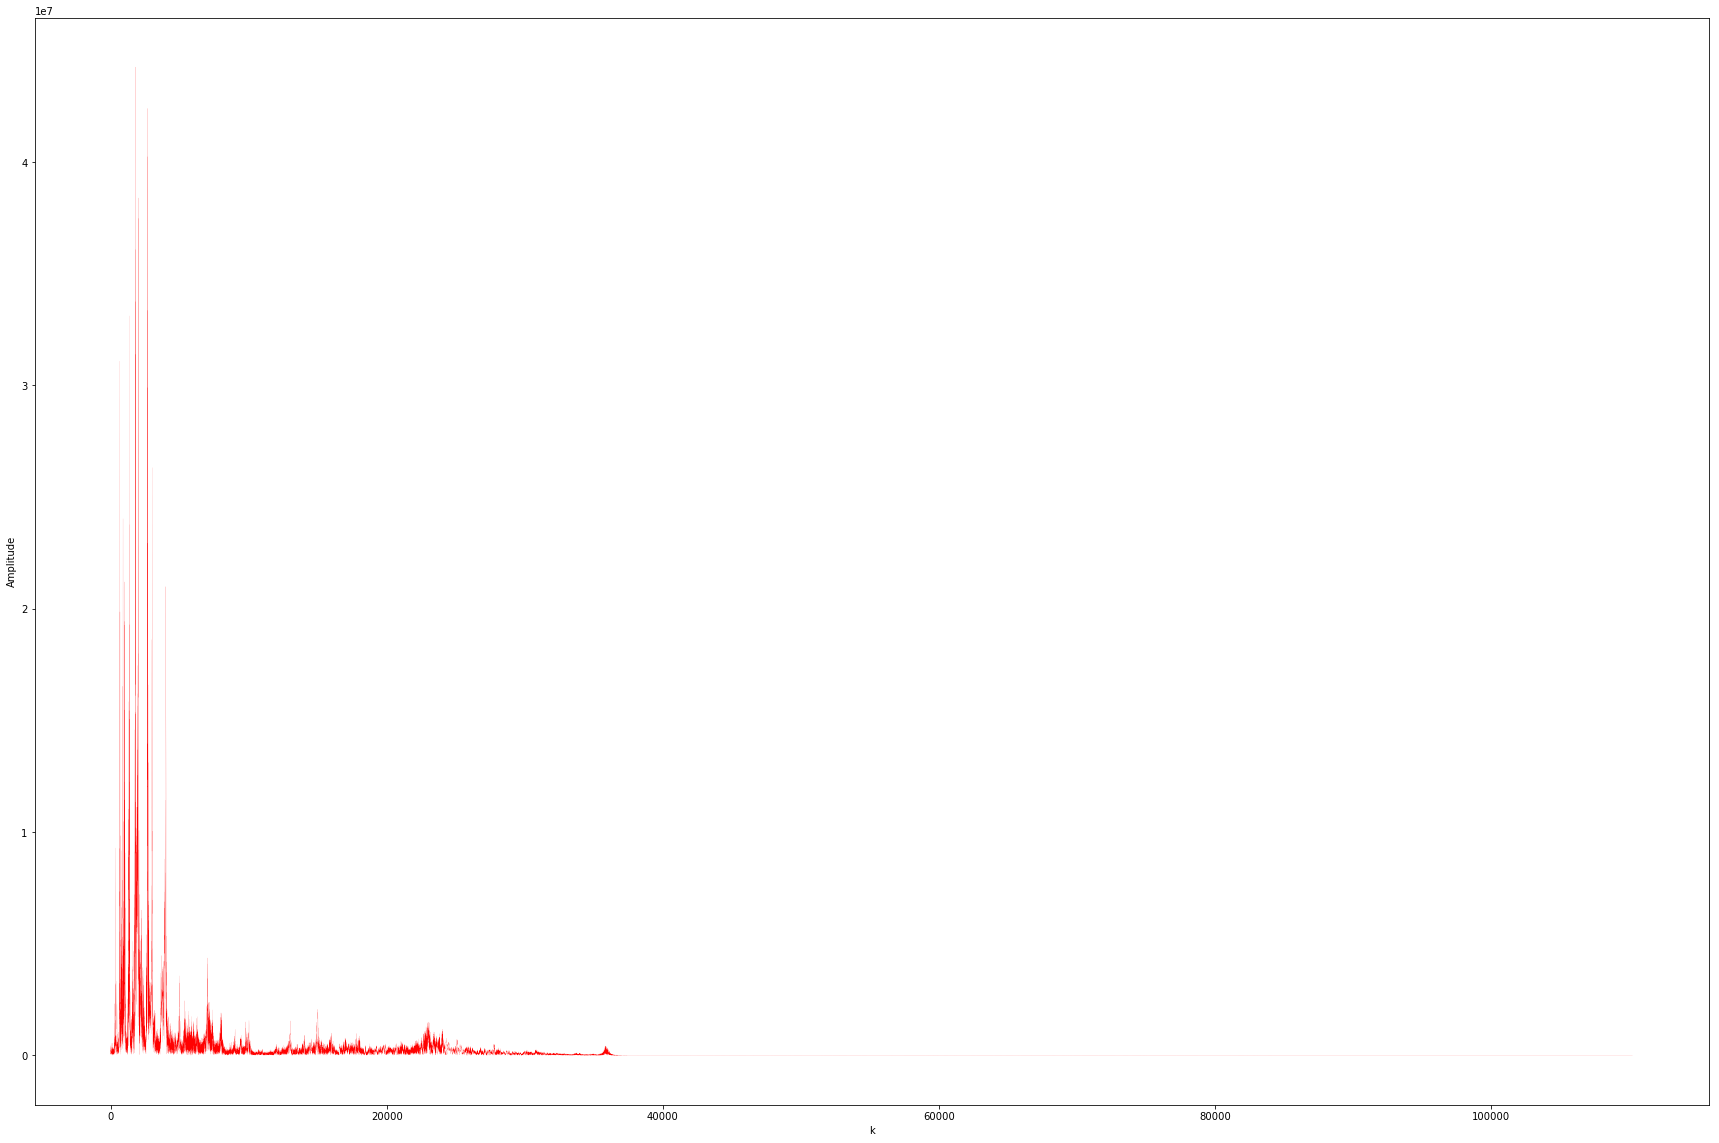

In [222]:
# Plot the FFT
#plt.yscale('log')
plt.figure(figsize = (30, 20))
plt.plot(abs(fourier_transform[:(d - 1)]), linewidth = 0.08, alpha = 3, color = '#ff0000') 
plt.xlabel("k")
plt.ylabel("Amplitude")


In [223]:
# The Fourier Transform creates a imaginary. The symmetry of the complex Fourier transform is very important
# A real time domain signal corresponds to a frequency spectrum with an even real part, and an odd imaginary part (http://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch31.pdf)
# We only need the real data solution, so we can grab the first half, then calculate the frequency and plot the frequency against a scaled amplitude
length_audio_data = len(audio_data)
fourier_transform_real_part = fourier_transform[0:int(length_audio_data / 2)]

# Scale by the number of observations so that the magnitude does not depend on the length
fourier_transform_real_part_scaled = fourier_transform_real_part / float(length_audio_data)

# Calculate the frequency at each point in Hz
frequency_of_song = np.arange(0, (length_audio_data / 2), 1.0) * (int(fs) / length_audio_data)

# Calculate power
power_db = 10 * np.log10(fourier_transform_real_part_scaled)

In [224]:
#len(fourier_transform_real_part)
#fourier_transform_real_part.max(), fourier_transform_real_part.min()
print (fourier_transform_real_part_scaled.max(), fourier_transform_real_part_scaled.min())
print (frequency_of_song.max(), frequency_of_song.min())


(162.026977236+51.4310856309j) (-186.472284962-47.0538429668j)
23999.7823129 0.0


/Users/valentin/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


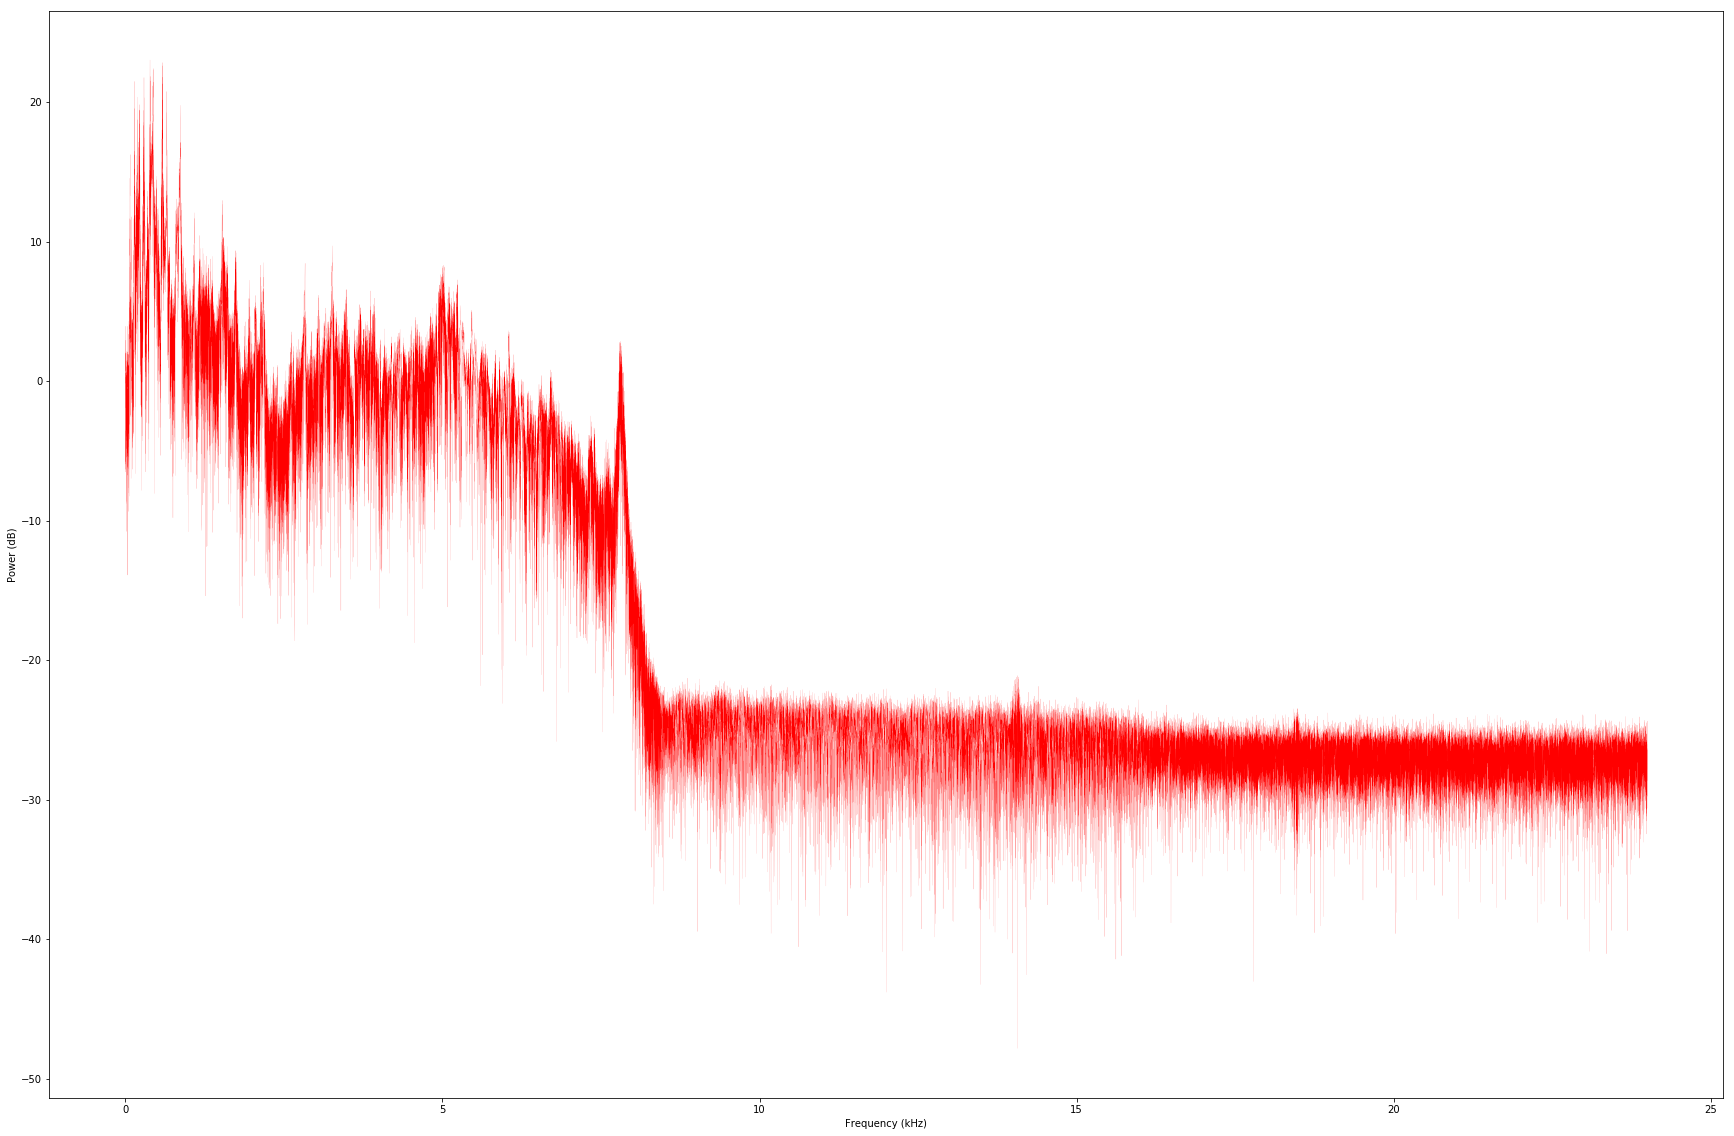

In [225]:
plt.figure(figsize = (30, 20))
plt.plot(frequency_of_song / 1000, power_db, color = '#ff0000', linewidth = 0.08)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")

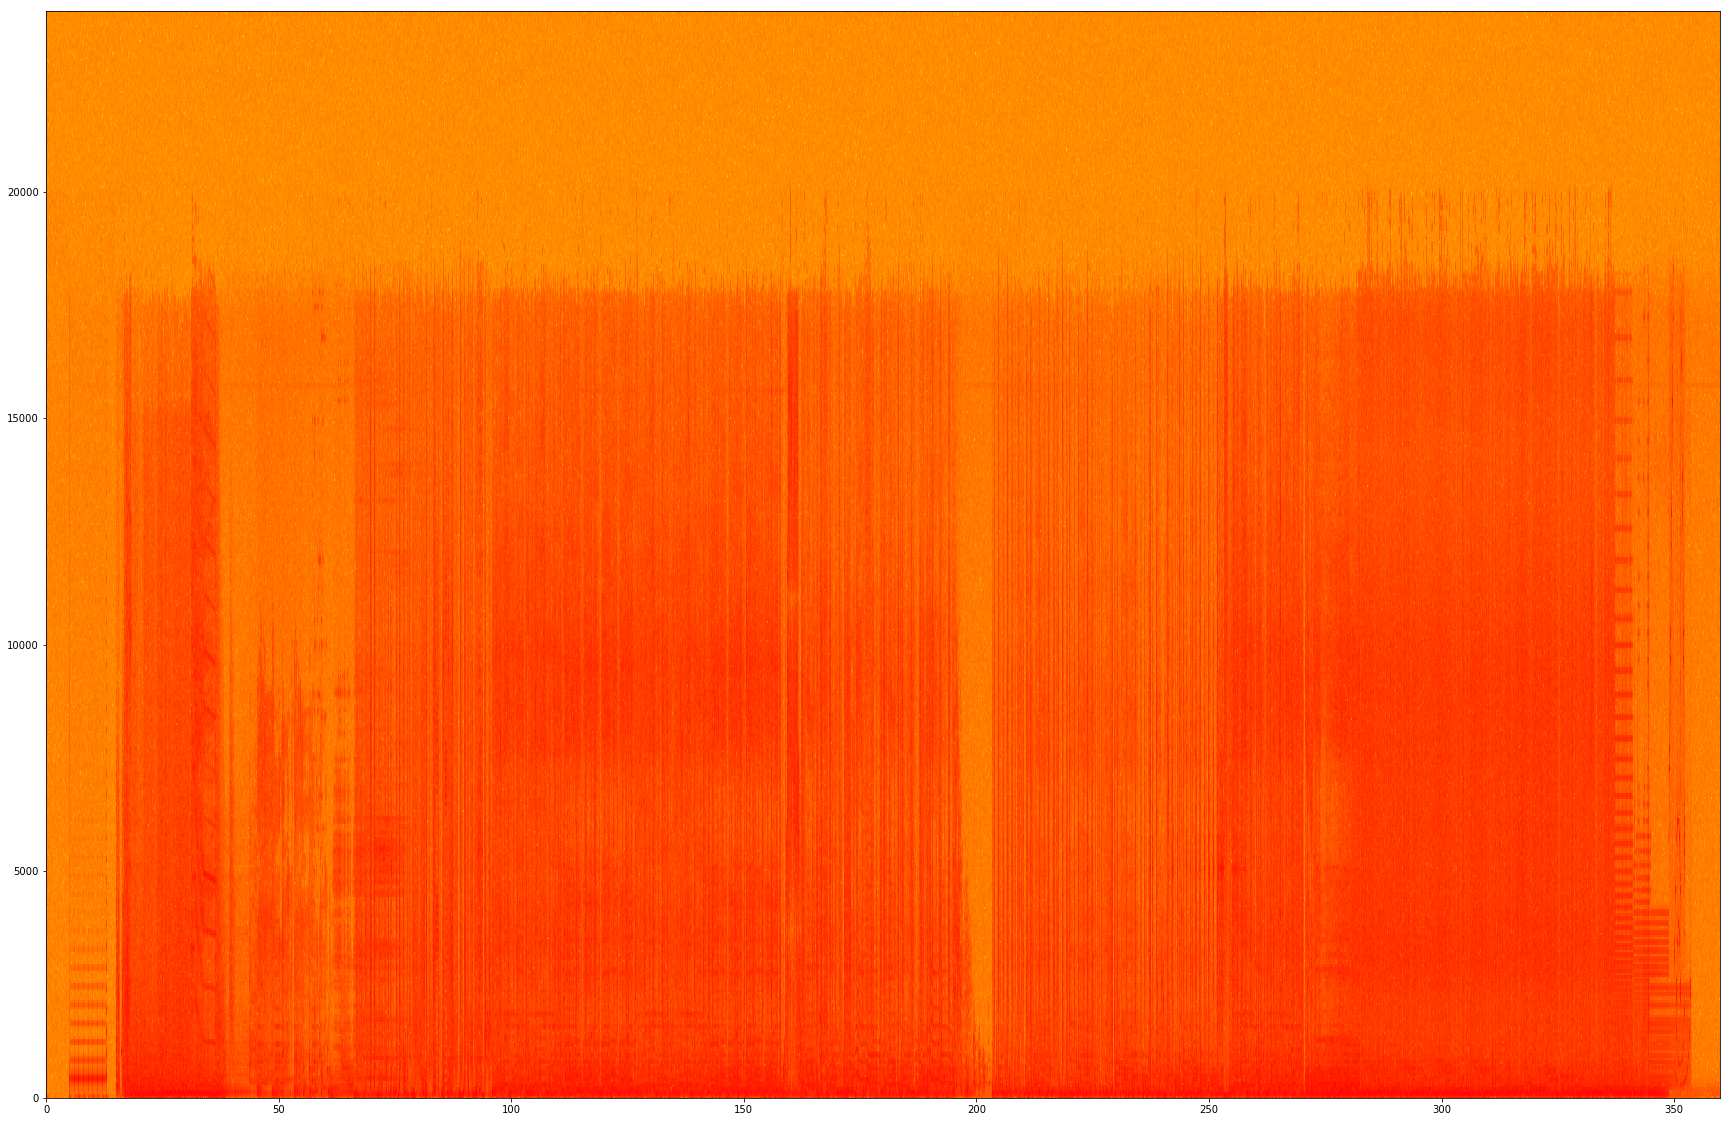

In [242]:
# Plot a spectrogram
# Location of the song
files_location = "/Users/valentin/Documents/MusicEngine/wav/"     #"/Users/valentin/Documents/MusicEngine/wav/"
song_id = "SIOiqyC9vQE"                                     #"TARGET_Biz_Amulet"; Suzanita - 2kvAahQmWnc


# Returns the sample rate (in samples/sec) and data from a WAV file
fs, soundtrack_data = wavfile.read(files_location + song_id + ".wav")
audio_data = soundtrack_data.T                      # this is a two channel soundtrack, get only one of the tracks

plt.figure(2, figsize = (30, 20))
Pxx, freqs, bins, im = plt.specgram(audio_data,
                                    Fs = fs,
                                    NFFT = 1024,
                                    #window = window_hanning(),
                                    cmap = plt.get_cmap('autumn_r'))
#cbar = plt.colorbar(im)
#plt.xlabel('Time (s)')
#plt.ylabel('Frequency (Hz)')
#cbar.set_label('Intensity dB')
#plt.show()


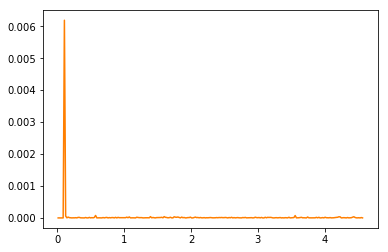

In [227]:
# Examine particular regions
np.where(freqs == 1000)
MHZ10 = Pxx[233,:]
plt.plot(bins, MHZ10, color = '#ff7f00')

In [210]:
print(fourier_transform.shape, audio_data.shape)

(1661950,) (1661950,)


(1661950,)

In [205]:
# Create a spectrogram using Mel cepstral filter

# From Wikipedia: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
# In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum
# of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

# The code below is from http://cs231n.stanford.edu/reports/2017/pdfs/22.pdf

%matplotlib inline

import librosa
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# The librosa.display module needs to be explicitly imported (https://github.com/librosa/librosa/issues/441)
import librosa.display


files_location = "C:/Users/bre49823/GitRepo/MusicEngine/"
song_id = "dt_16bars_102rap"

song_path = files_location + song_id + ".wav"

y , sr = librosa.load(song_path, mono = True)

# Create Mel spectrogram
M = librosa.feature.melspectrogram(
    y = y,
    sr = sr,
    n_mels = 128,
    n_fft = 2048,
    hop_length = 1024)

spectogram = librosa.power_to_db(
    M , ref = np.max)

# Plot Mel spectrogram
plt.figure(figsize = (15, 7))
librosa.display.specshow(spectogram,
                         y_axis = 'mel', fmax = 20000,
                         x_axis = 'time')
plt.colorbar(format = '%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/valentin/Documents/GitHub/MusicEngine/C:/Users/bre49823/GitRepo/MusicEngine/dt_16bars_102rap.wav'

In [ ]:
# https://stackoverflow.com/questions/2648151/python-frequency-detection
  
# Read in a WAV and find the freq's
import pyaudio
import wave
import numpy as np

chunk = 2048

# open up a wave
wf = wave.open('test-tones/440hz.wav', 'rb')
swidth = wf.getsampwidth()
RATE = wf.getframerate()
# use a Blackman window
window = np.blackman(chunk)
# open stream
p = pyaudio.PyAudio()
stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = RATE,
                output = True)

# read some data
data = wf.readframes(chunk)
# play stream and find the frequency of each chunk
while len(data) == chunk*swidth:
    # write data out to the audio stream
    stream.write(data)
    # unpack the data and times by the hamming window
    indata = np.array(wave.struct.unpack("%dh"%(len(data)/swidth),\
                                         data))*window
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    else:
        thefreq = which*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    # read some more data
    data = wf.readframes(chunk)
if data:
    stream.write(data)
stream.close()
p.terminate()

In [ ]:
# Extract features from WAV file
# source: https://stackoverflow.com/questions/34742225/how-to-extract-data-from-a-wav-file-using-python-matplotlib-library

""" This work is licensed under a Creative Commons Attribution 3.0 Unported License.
Frank Zalkow, 2012-2013 """

import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac = 0.5, window = np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize / 2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape = (cols, frameSize), strides = (samples.strides[0] * hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    


""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr = 44100, factor = 20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins - 1) / max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):
        if i == len(scale) - 1:
            newspec[:,i] = np.sum(spec[:, scale[i]:], axis = 1)
        else:        
            newspec[:,i] = np.sum(spec[:, scale[i]:scale[i + 1]], axis = 1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins * 2, 1. / sr)[: freqbins + 1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale) - 1:
            freqs += [np.mean(allfreqs[scale[i]:])]
        else:
            freqs += [np.mean(allfreqs[scale[i]:scale[i + 1]])]

    return newspec, freqs


""" plot spectrogram"""
def plotstft(audiopath, binsize = 2 ** 10, plotpath = None, colormap = "jet"):
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor = 1.0, sr = samplerate)
    ims = 20. * np.log10(np.abs(sshow) / 10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    plt.figure(figsize = (15, 7.5))
    plt.imshow(np.transpose(ims), origin = "lower", aspect = "auto", cmap = colormap, interpolation = "none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins - 1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins - 1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs * len(samples) / timebins) + (0.5 * binsize)) / samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins - 1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches = "tight")
    else:
        plt.show()

    plt.clf()


    
    
files_location = "/Users/valentin/Documents/MusicEngine/wav/"
song_id = "TARGET_Biz_Amulet"

plotstft(files_location + song_id + ".wav")